# Project: Wrangling and Analyze Data

## Introduction

This project is a data wrangling and analysis of [WeRateDogs](https://twitter.com/dog_rates) tweet archive based on Twitter data provided. WeRateDogs Enhanced Twitter archive contains data extracted from 2356 of the 5000+ tweets posted between the 15th of November 2015 and the 1st of August 2017 from the [@dog_rates](https://twitter.com/dog_rates)  Twitter account archive.
<br>WeRateDogs is a Twitter account that rates people's dogs with a humorous comments about the dog.

<br>My analysis is based on the source of the tweets, popular dog names, and the month of the year with the highest tweet count.


In [1]:
# import the required python libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tweepy
import requests
import os
from tweepy import OAuthHandler
import json
from timeit import default_timer as timer
%matplotlib inline

## Data Gathering
In the cell below, gather **all** three pieces of data for this project and load them in the notebook. **Note:** the methods required to gather each data are different.
1. Directly download the WeRateDogs Twitter archive data (twitter_archive_enhanced.csv)

In [2]:
# load the csv file
archive_df = pd.read_csv('twitter-archive-enhanced.csv')

2. Use the Requests library to download the tweet image prediction (image_predictions.tsv)

In [3]:
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
r = requests.get(url)
with open('image_predictions.tsv', mode='wb') as file:
    file.write(r.content)
img_prediction = pd.read_csv('image-predictions.tsv', sep='\t')

3. Use the Tweepy library to query additional data via the Twitter API (tweet_json.txt)

In [4]:
# Query Twitter API for each tweet in the Twitter archive and save JSON in a text file
# These are hidden to comply with Twitter's API terms and conditions
consumer_key = 'HIDDEN'
consumer_secret = 'HIDDEN'
access_token = 'HIDDEN'
access_secret = 'HIDDEN'

auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True)


In [5]:
#load Twitter API data from file
filename = "tweet-json.txt"
df_list = []
with open(filename) as file:
    for line in file:
        tweet = json.loads(line)
        tweet_id = tweet["id_str"]
        retweet_count = tweet["retweet_count"]
        favorite_count = tweet["favorite_count"]
# collect needed fields
        df_list.append({'tweet_id' : tweet_id,'retweet_count' : retweet_count,'favorite_count' : favorite_count})

#convert to DF        
tweet_api = pd.DataFrame ( df_list, columns = ['tweet_id', 'retweet_count' , 'favorite_count'])
tweet_api.head()

,tweet_id,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048


## Assessing Data
In this section, detect and document at least **eight (8) quality issues and two (2) tidiness issue**. You must use **both** visual assessment
programmatic assessement to assess the data.



In [6]:
archive_df

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None


In [7]:
archive_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [8]:
archive_df.sample(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
2270,667502640335572993,NaN,NaN,2015-11-20 00:40:05 +0000,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",Say hello to Hall and Oates. Oates is winking ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/667502640...,11,10,Hall,None,None,None,None
2283,667200525029539841,NaN,NaN,2015-11-19 04:39:35 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Joshwa. He is a fuckboy supreme. He cl...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/667200525...,11,10,Joshwa,None,None,None,None
1445,696518437233913856,NaN,NaN,2016-02-08 02:18:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Oh my god 10/10 for every little hot dog pupper,NaN,NaN,NaN,NaN,10,10,None,None,None,pupper,None
1819,676590572941893632,6.765883e+17,4.196984e+09,2015-12-15 02:32:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",After some outrage from the crowd. Bubbles is ...,NaN,NaN,NaN,NaN,7,10,None,None,None,None,None
2111,670442337873600512,NaN,NaN,2015-11-28 03:21:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Koda. He's large. Looks very soft. Great ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/670442337...,11,10,Koda,None,None,None,None


In [9]:
img_prediction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [10]:
img_prediction.sample(5)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
942,704113298707505153,https://pbs.twimg.com/media/CcWDTerUAAALORn.jpg,2,otter,0.945537,False,mink,0.018231,False,sea_lion,0.015861,False
1061,715200624753819648,https://pbs.twimg.com/media/CeznK6IWEAEFUPq.jpg,1,Chihuahua,0.956787,True,beagle,0.008383,True,Labrador_retriever,0.008344,True
2001,876484053909872640,https://pbs.twimg.com/media/DCnll_dUQAAkBdG.jpg,1,golden_retriever,0.874566,True,Irish_terrier,0.037354,True,chow,0.016724,True
1567,794205286408003585,https://pbs.twimg.com/media/CwWVe_3WEAAHAvx.jpg,3,pedestal,0.662660,False,fountain,0.294827,False,brass,0.020371,False
689,684188786104872960,https://pbs.twimg.com/media/CX66EiJWkAAVjA-.jpg,1,kelpie,0.537782,True,American_Staffordshire_terrier,0.082953,True,Staffordshire_bullterrier,0.069760,True


In [11]:
tweet_api.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   tweet_id        2354 non-null   object
 1   retweet_count   2354 non-null   int64 
 2   favorite_count  2354 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 55.3+ KB


In [12]:
tweet_api.sample(5)

,tweet_id,retweet_count,favorite_count
189,855857698524602368,2313,12498
665,790581949425475584,8183,22473
2014,672169685991993344,408,1074
295,837366284874571778,6005,23074
1992,672604026190569472,445,1188


In [13]:
type(archive_df.timestamp[5])

str

In [14]:
archive_df.name.value_counts().head(15)

None       745
a           55
Charlie     12
Cooper      11
Lucy        11
Oliver      11
Tucker      10
Penny       10
Lola        10
Winston      9
Bo           9
Sadie        8
the          8
Daisy        7
Buddy        7
Name: name, dtype: int64

In [15]:
archive_df.duplicated().any()

False

In [16]:
img_prediction.duplicated().any()

False

In [17]:
tweet_api.duplicated().any()

False

### Quality issues
1. Drop all Retweet related columns

2. Replacing 'None' value in all dataframes

3. Convert datatype assigned to `tweet_id` column from int to str All dataframes

4. Convert the `timestamp` and `retweeted_status_timestamp` datatype to datetime

5. Simplify the `source` column by extracting and replacing with it's display string.

6. Drop tweets with missing data in `expanded_urls`

7. Rename some columns in `imgprediction_copy` to be more descriptive.

8. Drop tweet without image

### Tidiness issues
1. Collapse the column (doggo, floofer, pupper and puppo) into a new column named dog_category

2. Merge all the data in `twtarchive_copy` & `imgprediction_copy`

## Cleaning Data
In this section, clean **all** of the issues you documented while assessing. 

**Note:** Make a copy of the original data before cleaning. Cleaning includes merging individual pieces of data according to the rules of [tidy data](https://cran.r-project.org/web/packages/tidyr/vignettes/tidy-data.html). The result should be a high-quality and tidy master pandas DataFrame (or DataFrames, if appropriate).

In [18]:
# Make copies of original pieces of data
twtarchive_copy = archive_df.copy()
imgprediction_copy = img_prediction.copy()
twtapi_copy = tweet_api.copy()

## Quality Issues

### Issue #1: Drop all Retweet related columns

#### Define:
Drop the following columns

- in_reply_to_status_id
- in_reply_to_user_id
- retweeted_status_id
- retweeted_status_user_id
- retweeted_status_timestamp

#### Code

In [19]:
twtarchive_copy = twtarchive_copy[twtarchive_copy.retweeted_status_id.isnull()]
twtarchive_copy = twtarchive_copy[twtarchive_copy.retweeted_status_user_id.isnull()]
twtarchive_copy = twtarchive_copy[twtarchive_copy.retweeted_status_timestamp.isnull()]

In [20]:
twtarchive_copy.drop(columns =['in_reply_to_status_id', 'in_reply_to_user_id', 'retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp'], inplace=True)

#### Test

In [21]:
twtarchive_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   tweet_id            2175 non-null   int64 
 1   timestamp           2175 non-null   object
 2   source              2175 non-null   object
 3   text                2175 non-null   object
 4   expanded_urls       2117 non-null   object
 5   rating_numerator    2175 non-null   int64 
 6   rating_denominator  2175 non-null   int64 
 7   name                2175 non-null   object
 8   doggo               2175 non-null   object
 9   floofer             2175 non-null   object
 10  pupper              2175 non-null   object
 11  puppo               2175 non-null   object
dtypes: int64(3), object(9)
memory usage: 220.9+ KB


### Issue #2: Replacing 'None' value in all dataframes

#### Define
Replacing "None" values with NaN in all dataframes

#### Code

In [22]:
twtarchive_copy.replace(value = np.nan, to_replace = ["None"], inplace = True)
imgprediction_copy.replace(value = np.nan, to_replace = ["None"], inplace = True)
twtapi_copy.replace(value = np.nan, to_replace = ["None"], inplace = True)

#### Test

In [23]:
twtarchive_copy.isin(["None"]).sum()

tweet_id              0
timestamp             0
source                0
text                  0
expanded_urls         0
rating_numerator      0
rating_denominator    0
name                  0
doggo                 0
floofer               0
pupper                0
puppo                 0
dtype: int64

In [24]:
imgprediction_copy.isin(["None"]).sum()

tweet_id    0
jpg_url     0
img_num     0
p1          0
p1_conf     0
p1_dog      0
p2          0
p2_conf     0
p2_dog      0
p3          0
p3_conf     0
p3_dog      0
dtype: int64

In [25]:
twtapi_copy.isin(["None"]).sum()

tweet_id          0
retweet_count     0
favorite_count    0
dtype: int64

### Issue #3: Convert datatype assigned to tweet_id column from int to str [All dataframes]

#### Define
Convert datatype assigned to `tweet_id` column (int -> str) in All dataframes

#### Code

In [26]:
twtarchive_copy.tweet_id = twtarchive_copy.tweet_id.astype(object)
twtapi_copy.tweet_id = twtapi_copy.tweet_id.astype(object)
imgprediction_copy.tweet_id = imgprediction_copy.tweet_id.astype(object)

#### Test

In [27]:
twtarchive_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   tweet_id            2175 non-null   object
 1   timestamp           2175 non-null   object
 2   source              2175 non-null   object
 3   text                2175 non-null   object
 4   expanded_urls       2117 non-null   object
 5   rating_numerator    2175 non-null   int64 
 6   rating_denominator  2175 non-null   int64 
 7   name                1495 non-null   object
 8   doggo               87 non-null     object
 9   floofer             10 non-null     object
 10  pupper              234 non-null    object
 11  puppo               25 non-null     object
dtypes: int64(2), object(10)
memory usage: 220.9+ KB


In [28]:
imgprediction_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   object 
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(1), object(5)
memory usage: 152.1+ KB


### Issue #4: Convert the `timestamp` and `retweeted_status_timestamp` datatype to datetime

#### Define
The `timestamp` and `retweeted_status_timestamp` column is converted to datetime datatype

#### Code

In [29]:
# timestamp and retweeted_status_timestamp
twtarchive_copy.timestamp = pd.to_datetime(twtarchive_copy.timestamp)

#### Test

In [30]:
twtarchive_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            2175 non-null   object             
 1   timestamp           2175 non-null   datetime64[ns, UTC]
 2   source              2175 non-null   object             
 3   text                2175 non-null   object             
 4   expanded_urls       2117 non-null   object             
 5   rating_numerator    2175 non-null   int64              
 6   rating_denominator  2175 non-null   int64              
 7   name                1495 non-null   object             
 8   doggo               87 non-null     object             
 9   floofer             10 non-null     object             
 10  pupper              234 non-null    object             
 11  puppo               25 non-null     object             
dtypes: datetime64[ns, UTC](1), int64(2

### Issue #5: Simplify the `source` column by extracting and replacing with it's display string.

#### Define

Extract the string between `<a href="">` and `</a>` in the `source`

#### Code

In [31]:
twtarchive_copy['source'] = twtarchive_copy['source'].str.extract('^<a.+>(.+)</a>$')

#### Test

In [32]:
twtarchive_copy.source.value_counts()

Twitter for iPhone     2042
Vine - Make a Scene      91
Twitter Web Client       31
TweetDeck                11
Name: source, dtype: int64

### Issue #6: Drop tweets with missing data in `expanded_urls` (links to the tweet).

#### Define 
Drop tweets with missing data in the `expanded_urls`

#### Code

In [33]:
twtarchive_copy = twtarchive_copy[twtarchive_copy.expanded_urls.notnull()]

#### Test

In [34]:
twtarchive_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2117 entries, 0 to 2355
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            2117 non-null   object             
 1   timestamp           2117 non-null   datetime64[ns, UTC]
 2   source              2117 non-null   object             
 3   text                2117 non-null   object             
 4   expanded_urls       2117 non-null   object             
 5   rating_numerator    2117 non-null   int64              
 6   rating_denominator  2117 non-null   int64              
 7   name                1495 non-null   object             
 8   doggo               84 non-null     object             
 9   floofer             10 non-null     object             
 10  pupper              232 non-null    object             
 11  puppo               24 non-null     object             
dtypes: datetime64[ns, UTC](1), int64(2

### Issue #7:  Rename some columns in `imgprediction_copy` to be more descriptive.

#### Define
Rename `p1`, `p1_conf`, `p1_dog`, `p2`, `p2_conf`, `p2_dog`, `p3`, `p3_conf`, `p3_dog` columns

#### Code

In [35]:
cols = {'p1':'first_prediction', 'p1_conf': 'first_confidence', 'p1_dog': 'first_dog',
        'p2': 'second_prediction', 'p2_conf': 'second_confidence', 'p2_dog': 'second_dog',
        'p3': 'third_prediction', 'p3_conf': 'third_confidence', 'p3_dog': 'third_dog'}
imgprediction_copy.rename(columns=cols, inplace=True)

#### Test

In [36]:
list(imgprediction_copy)

['tweet_id',
 'jpg_url',
 'img_num',
 'first_prediction',
 'first_confidence',
 'first_dog',
 'second_prediction',
 'second_confidence',
 'second_dog',
 'third_prediction',
 'third_confidence',
 'third_dog']

### Issue #8: Drop tweet without image

#### Define
Use `imgprediction_copy` table to identify the tweets without images in the archive table and remove them.

#### Code

In [37]:
# Number of tweets with images
tweets_with_images = list(imgprediction_copy.tweet_id.unique())
len(tweets_with_images)

2075

In [38]:
# Check all tweets are in twtarchive_copy dataset
twtarchive_copy.tweet_id.isin(tweets_with_images).sum()

1994

In [39]:
# Drop the other tweets
twtarchive_copy = twtarchive_copy[twtarchive_copy.tweet_id.isin(tweets_with_images)]

#### Test

In [40]:
twtarchive_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1994 entries, 0 to 2355
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            1994 non-null   object             
 1   timestamp           1994 non-null   datetime64[ns, UTC]
 2   source              1994 non-null   object             
 3   text                1994 non-null   object             
 4   expanded_urls       1994 non-null   object             
 5   rating_numerator    1994 non-null   int64              
 6   rating_denominator  1994 non-null   int64              
 7   name                1448 non-null   object             
 8   doggo               74 non-null     object             
 9   floofer             8 non-null      object             
 10  pupper              212 non-null    object             
 11  puppo               23 non-null     object             
dtypes: datetime64[ns, UTC](1), int64(2

# Tidiness Issue

### Issue #1: The (`doggo`, `floofer`, `pupper` and `puppo`) columns should be one category column. (dog_category)

#### Define
Collapse the stated column (doggo, floofer, pupper and puppo) into a new column named dog_category

#### Code

In [41]:
twtarchive_copy['dog_category'] = twtarchive_copy[['doggo', 'floofer', 'pupper', 'puppo']].astype(str).agg(lambda x: ','.join([stage for stage in x.values if stage != 'nan']), axis=1)
twtarchive_copy.loc[twtarchive_copy.dog_category == '', 'dog_category'] = np.nan
twtarchive_copy.drop(columns=['doggo', 'floofer', 'pupper', 'puppo'], inplace=True)

#### Test

In [42]:
twtarchive_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1994 entries, 0 to 2355
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            1994 non-null   object             
 1   timestamp           1994 non-null   datetime64[ns, UTC]
 2   source              1994 non-null   object             
 3   text                1994 non-null   object             
 4   expanded_urls       1994 non-null   object             
 5   rating_numerator    1994 non-null   int64              
 6   rating_denominator  1994 non-null   int64              
 7   name                1448 non-null   object             
 8   dog_category        306 non-null    object             
dtypes: datetime64[ns, UTC](1), int64(2), object(6)
memory usage: 155.8+ KB


### Issue #2: Merge all the data in `twtarchive_copy`& `imgprediction_copy`

#### Define
Merge all the dataset together using `tweet_id`

#### Code

In [43]:
master = pd.merge(twtarchive_copy, imgprediction_copy,
                            on=['tweet_id'], how='inner')

In [44]:
master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1994 entries, 0 to 1993
Data columns (total 20 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            1994 non-null   object             
 1   timestamp           1994 non-null   datetime64[ns, UTC]
 2   source              1994 non-null   object             
 3   text                1994 non-null   object             
 4   expanded_urls       1994 non-null   object             
 5   rating_numerator    1994 non-null   int64              
 6   rating_denominator  1994 non-null   int64              
 7   name                1448 non-null   object             
 8   dog_category        306 non-null    object             
 9   jpg_url             1994 non-null   object             
 10  img_num             1994 non-null   int64              
 11  first_prediction    1994 non-null   object             
 12  first_confidence    1994 non-null 

## Storing Data
Save gathered, assessed, and cleaned master dataset to a CSV file named "twitter_archive_master.csv".

In [45]:
master.to_csv('twitter_archive_master.csv', index=False)

## Analyzing and Visualizing Data
In this section, analyze and visualize your wrangled data. You must produce at least **three (3) insights and one (1) visualization.**

### Insight 1

Which source generated more tweets ?

In [46]:
master['source'].value_counts()

Twitter for iPhone    1955
Twitter Web Client      28
TweetDeck               11
Name: source, dtype: int64

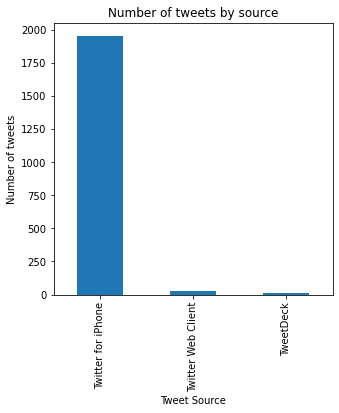

In [47]:
master.source.value_counts().plot.bar(figsize=(5, 5), xlabel="Tweet Source", ylabel="Number of tweets", title="Number of tweets by source");

### Insight 2

Which dog names are more popular ?

In [48]:
# excluding outlier "a"
dog_names = master[master.name != "a"]
dog_names = dog_names.name.value_counts().head(11)
dog_names

Charlie    11
Oliver     10
Cooper     10
Lucy       10
Penny       9
Tucker      9
Winston     8
Sadie       8
Lola        7
the         7
Toby        7
Name: name, dtype: int64

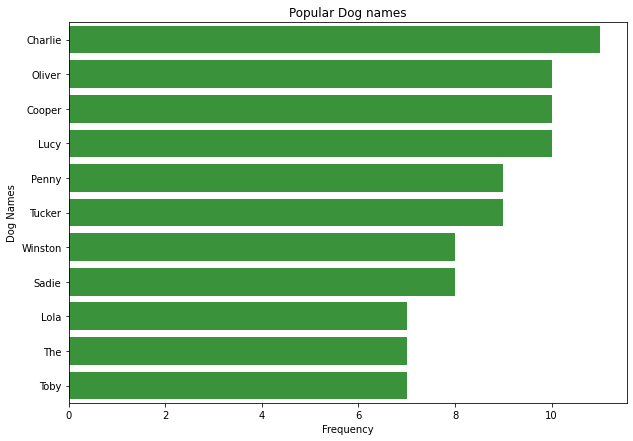

In [49]:
plt.figure(figsize=(10,7))
sns.barplot(y=[i.title() for i in dog_names.index], x = list(dog_names),
           color=sns.color_palette()[2])
plt.title('Popular Dog names')
plt.xlabel('Frequency')
plt.ylabel('Dog Names')
plt.show();

### Insight 3

What is the most common dog breed after the first prediction?

In [50]:
master.first_prediction.value_counts()[0:10]

golden_retriever      139
Labrador_retriever     95
Pembroke               88
Chihuahua              79
pug                    54
chow                   41
Samoyed                40
toy_poodle             38
Pomeranian             38
malamute               29
Name: first_prediction, dtype: int64

### Insights:
1. iPhone is the device is the most used source

2. The most popular dog name is 'Charlie'

3. Golden retriever is the outcome of most of the first image predictions